In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from pandas_profiling import ProfileReport
%matplotlib inline
import datetime



In [91]:
dataset = pd.read_csv('DAF_Trucks_in_the_Netherlands.csv')

Reading/importing dataset which is 'DAF_Trucks_in_the_Netherlands.csv'

In [92]:

dataset=dataset[['License plate number','Vehicle type','Datum tenaamstelling','Design','First color','second color','Amount of cylinders','Engine Capacity','Mass empty vehicle','Permissible maximum vehicle mass','Mass roadworthy','Load Capacity','European vehicle category']]


Since there were quite a few unnecessary columns in the dataset, only the required columns were selected and the rest were omitted.

In [93]:
dataset.columns

Index(['License plate number', 'Vehicle type', 'Datum tenaamstelling',
       'Design', 'First color', 'second color', 'Amount of cylinders',
       'Engine Capacity', 'Mass empty vehicle',
       'Permissible maximum vehicle mass', 'Mass roadworthy', 'Load Capacity',
       'European vehicle category'],
      dtype='object')

In [94]:
dataset.dtypes


License plate number                 object
Vehicle type                         object
Datum tenaamstelling                  int64
Design                               object
First color                          object
second color                         object
Amount of cylinders                 float64
Engine Capacity                     float64
Mass empty vehicle                  float64
Permissible maximum vehicle mass    float64
Mass roadworthy                     float64
Load Capacity                       float64
European vehicle category            object
dtype: object

In [95]:
dataset['Datum tenaamstelling'] =  pd.to_datetime(dataset['Datum tenaamstelling'], format='%Y%m%d')

In [96]:
dataset.head()

,License plate number,Vehicle type,Datum tenaamstelling,Design,First color,second color,Amount of cylinders,Engine Capacity,Mass empty vehicle,Permissible maximum vehicle mass,Mass roadworthy,Load Capacity,European vehicle category
0,0003ZB,Bedrijfsauto,2022-01-21,open met kraan,N.v.t.,N.v.t.,6.0,NaN,6375.0,11500.0,6475.0,5125.0,N2
1,0008TL,Personenauto,2007-10-11,Niet geregistreerd,ROOD,Niet geregistreerd,2.0,NaN,660.0,NaN,760.0,NaN,M1
2,0013BR,Personenauto,2010-09-10,Niet geregistreerd,WIT,Niet geregistreerd,2.0,NaN,670.0,NaN,770.0,NaN,M1
3,0021XZ,Personenauto,2005-08-10,sedan,ROOD,Niet geregistreerd,2.0,NaN,660.0,NaN,760.0,NaN,M1
4,0023UR,Personenauto,1987-03-25,Niet geregistreerd,WIT,Niet geregistreerd,4.0,NaN,780.0,NaN,880.0,NaN,M1


In [97]:
dataset.set_index('Datum tenaamstelling',inplace=True)



In [98]:
dataset.head()

,License plate number,Vehicle type,Design,First color,second color,Amount of cylinders,Engine Capacity,Mass empty vehicle,Permissible maximum vehicle mass,Mass roadworthy,Load Capacity,European vehicle category
Datum tenaamstelling,,,,,,,,,,,,
2022-01-21,0003ZB,Bedrijfsauto,open met kraan,N.v.t.,N.v.t.,6.0,NaN,6375.0,11500.0,6475.0,5125.0,N2
2007-10-11,0008TL,Personenauto,Niet geregistreerd,ROOD,Niet geregistreerd,2.0,NaN,660.0,NaN,760.0,NaN,M1
2010-09-10,0013BR,Personenauto,Niet geregistreerd,WIT,Niet geregistreerd,2.0,NaN,670.0,NaN,770.0,NaN,M1
2005-08-10,0021XZ,Personenauto,sedan,ROOD,Niet geregistreerd,2.0,NaN,660.0,NaN,760.0,NaN,M1
1987-03-25,0023UR,Personenauto,Niet geregistreerd,WIT,Niet geregistreerd,4.0,NaN,780.0,NaN,880.0,NaN,M1


In [100]:
dataset.describe()

,Amount of cylinders,Engine Capacity,Mass empty vehicle,Permissible maximum vehicle mass,Mass roadworthy,Load Capacity
count,57143.000000,48253.000000,57642.000000,54499.000000,57189.000000,24251.000000
mean,5.683198,10858.742192,8505.052462,20114.557790,8640.285719,9945.354666
std,0.907483,2782.385740,3695.513631,6459.164105,3694.471467,5409.623731
min,0.000000,590.000000,530.000000,900.000000,660.000000,100.000000
25%,6.000000,10837.000000,7284.000000,19000.000000,7408.000000,5960.000000
50%,6.000000,10837.000000,8155.000000,19500.000000,8265.000000,9537.000000
75%,6.000000,12902.000000,9330.000000,23900.000000,9480.000000,13594.000000
max,12.000000,22000.000000,54000.000000,54500.000000,54100.000000,36050.000000


The descriptioin above provides very useful data that shows the variety of products have been manufactured by DAF until 2023. 

In [28]:
dataset['Vehicle type'].value_counts()

Bedrijfsauto                             53140
Personenauto                              3884
Land- of bosb aanhw of getr uitr stuk     1311
Motorrijtuig met beperkte snelheid         576
Oplegger                                   262
Aanhangwagen                               201
Bus                                        156
Land- of bosbouwtrekker                     74
Autonome aanhangwagen                        3
Mobiele machine                              2
Middenasaanhangwagen                         1
Name: Vehicle type, dtype: int64

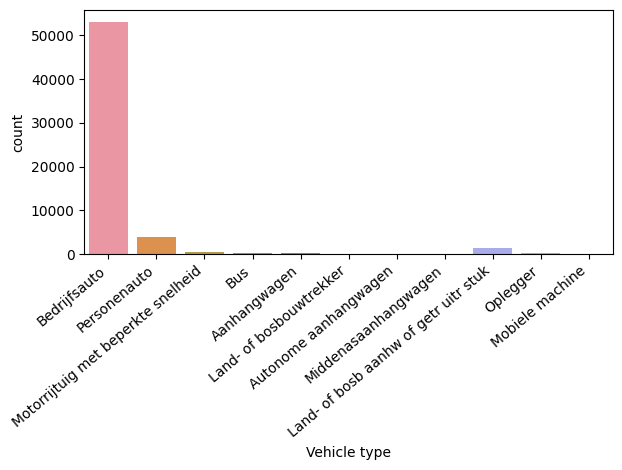

In [27]:
ax = sns.countplot(x='Vehicle type', data=dataset)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

It can be seen that the most manufactured 'Vehicle type' by DAF is Bedrijfsauto (in Dutch).                             

In [29]:
dataset['Design'].value_counts()

opleggertrekker                29423
gesloten opbouw                 5468
Niet geregistreerd              4896
afneembare bovenbouw            2745
open wagen                      2388
                               ...  
geluidswagen                       1
gepantserd voertuig                1
vervoer van uitzond. Lading        1
woonwagen                          1
mobiele zender                     1
Name: Design, Length: 75, dtype: int64

However the data is based on the manufacture in EU, the design of 4896 of the vehicles ordered by customers are not registered in the dataset. This problem is maninly beacuse of the especial designs that customers ordered or the privacy of data. 

In [41]:
dataset.isna().sum()

License plate number                    0
Vehicle type                            0
Design                                  0
First color                             0
second color                            0
Amount of cylinders                  2467
Engine Capacity                     11357
Mass empty vehicle                   1968
Permissible maximum vehicle mass     5111
Mass roadworthy                      2421
Load Capacity                       35359
European vehicle category               0
dtype: int64

In [42]:
dataset.fillna(dataset.mean(),inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_17788\8220036.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.fillna(dataset.mean(),inplace=True)


In [43]:
dataset.fillna(dataset.mode().iloc[0],inplace=True)

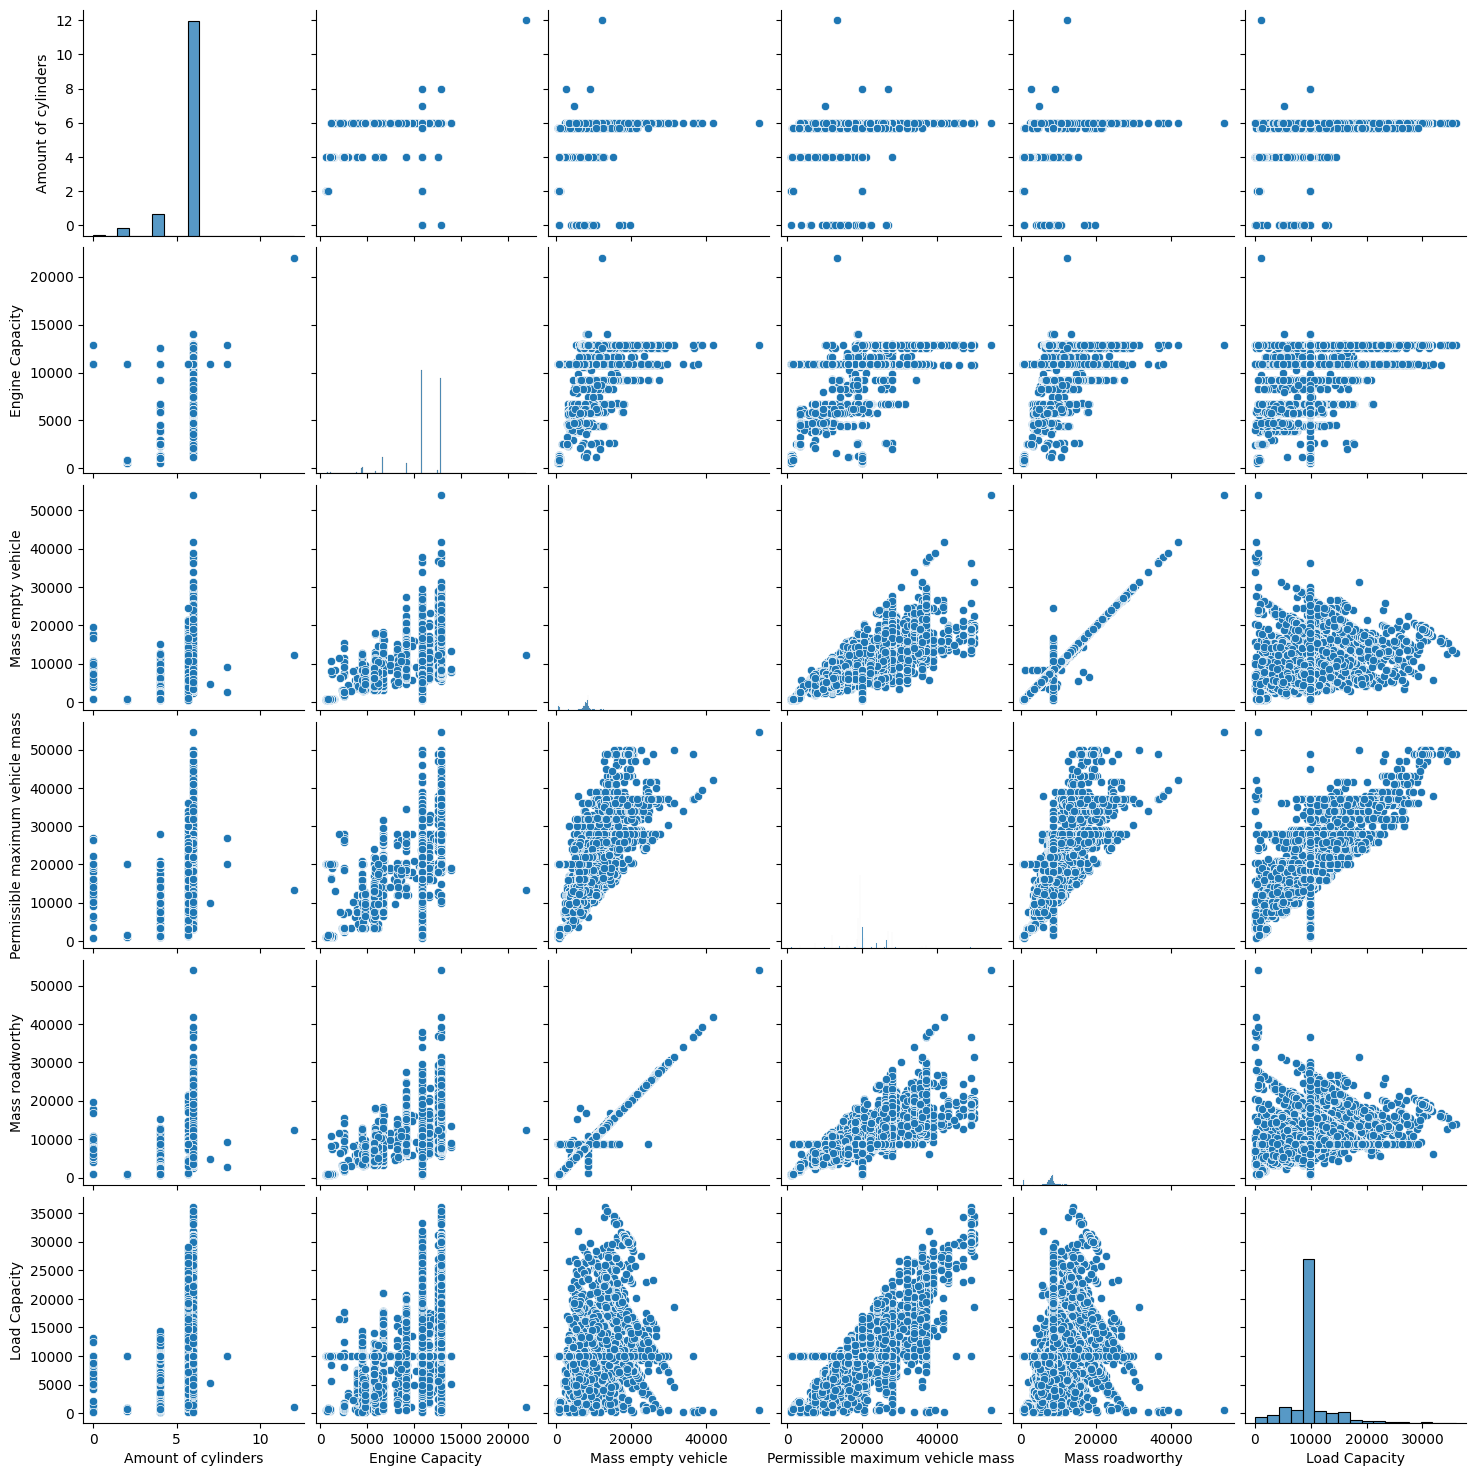

In [50]:
sns.pairplot(dataset)

In [102]:
np.round(dataset.corr(),2)

C:\Users\User\AppData\Local\Temp\ipykernel_17788\522326869.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  np.round(dataset.corr(),2)


,Amount of cylinders,Engine Capacity,Mass empty vehicle,Permissible maximum vehicle mass,Mass roadworthy,Load Capacity
Amount of cylinders,1.00,0.71,0.55,0.49,0.55,0.38
Engine Capacity,0.71,1.00,0.30,0.58,0.30,0.69
Mass empty vehicle,0.55,0.30,1.00,0.78,1.00,0.57
Permissible maximum vehicle mass,0.49,0.58,0.78,1.00,0.79,0.91
Mass roadworthy,0.55,0.30,1.00,0.79,1.00,0.59
Load Capacity,0.38,0.69,0.57,0.91,0.59,1.00


C:\Users\User\AppData\Local\Temp\ipykernel_17788\482572995.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(np.round(dataset.corr(),2),annot=True,vmin=0, vmax=1, cmap="BuPu")


<AxesSubplot: >

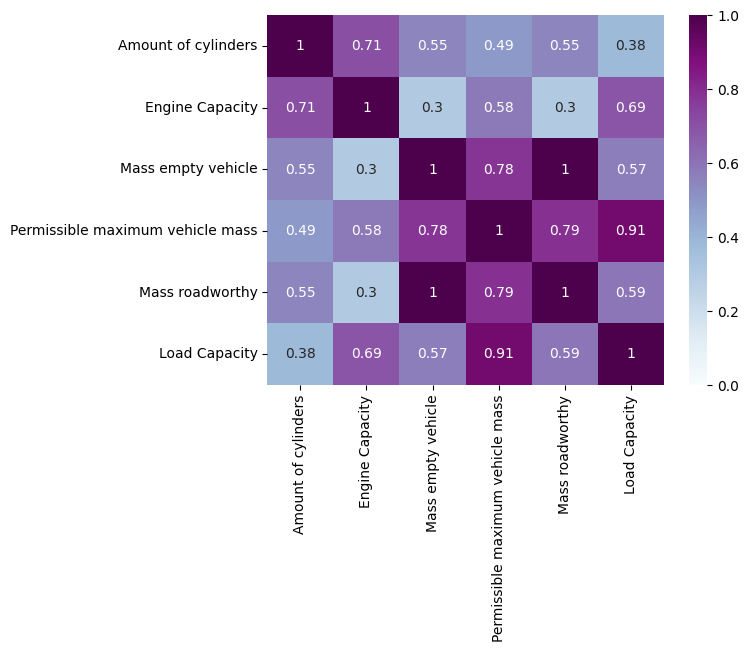

In [115]:
sns.heatmap(np.round(dataset.corr(),2),annot=True,vmin=0, vmax=1, cmap="BuPu")